# Benchmark results

This section investigates how scalable is our software. We report median run time, memory usage, and iteration number for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and a single core 3.3GHz processor. 

In [1]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using Measures

In [2]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"
dir_negativebinomial = "negativebinomial_results"
dir_negativebinomial_nodebias = "negativebinomial_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson; dir_negativebinomial; dir_negativebinomial_nodebias]

8-element Array{String,1}:
 "normal_results_nodebias"          
 "normal_results"                   
 "logistic_results_nodebias"        
 "logistic_results"                 
 "poisson_results_nodebias"         
 "poisson_results"                  
 "negativebinomial_results"         
 "negativebinomial_results_nodebias"

## First read the benchmark results in, and print out failed results

In [3]:
all_benchmark_results = Vector{Matrix}(undef, 8)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir  = dir * "/" * string(10000i) * "_by_1000000_run$j"
            
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            else
                println(string(10000i) * " run $j for " * dir * " does not exist")
            end
        end
        
        cur_response[i, 1] = median(a_particular_run[:, 1])
        cur_response[i, 2] = median(a_particular_run[:, 2])
        cur_response[i, 3] = median(a_particular_run[:, 3])
    end
    all_benchmark_results[k] = cur_response
end

120000 run 2 for poisson_results does not exist
120000 run 4 for poisson_results does not exist
70000 run 3 for negativebinomial_results does not exist
110000 run 5 for negativebinomial_results does not exist
40000 run 3 for negativebinomial_results_nodebias does not exist
80000 run 5 for negativebinomial_results_nodebias does not exist
120000 run 4 for negativebinomial_results_nodebias does not exist


In [4]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]
negativebinomial_results_nodebias = all_benchmark_results[7]
negativebinomial_results = all_benchmark_results[8];

## Compute average iterations till convergence

In [25]:
no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] negativebinomial_results_nodebias[:, 3]]
[median(no_debias_iter[:, i]) for i in 1:4]

4-element Array{Float64,1}:
  4.0
 10.0
 47.5
  9.0

In [26]:
yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3] negativebinomial_results[:, 3]]
[median(yes_debias_iter[:, i]) for i in 1:4]

4-element Array{Float64,1}:
  2.0
  2.5
 33.0
 15.0

# Plot time/memory/iter, separating debias and no-debias

In [15]:
storage = 1000 .* model_sizes .* 10^7 * .2 .* 1.25e-10

no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] negativebinomial_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1] negativebinomial_results[:, 1]]
no_debias_memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] negativebinomial_results_nodebias[:, 2] storage]
yes_debias_memory = [normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2] negativebinomial_results[:, 2] storage];
# no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] negativebinomial_results_nodebias[:, 3]]
# yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3] negativebinomial_results[:, 3]]

## Begin plotting

+ (d) = yes debias
+ (nd) = no-debias

In [6]:
yes_debias_times_plot

UndefVarError: UndefVarError: yes_debias_times_plot not defined

In [7]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration",
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(8))

no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration",
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(8))

yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage",
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(8))

no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage",
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(8))

# yes_debias_iter_plot = plot(model_sizes, yes_debias_iter, xlabel = "Sample Size (thousands)",
#     ylabel = "Number of Iterations", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
#     legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 120),
#     linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations")

# no_debias_iter_plot = plot(model_sizes, no_debias_iter, xlabel = "Sample Size (thousands)",
#     ylabel = "Number of Iterations", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"],
#     legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 120),
#     linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations");

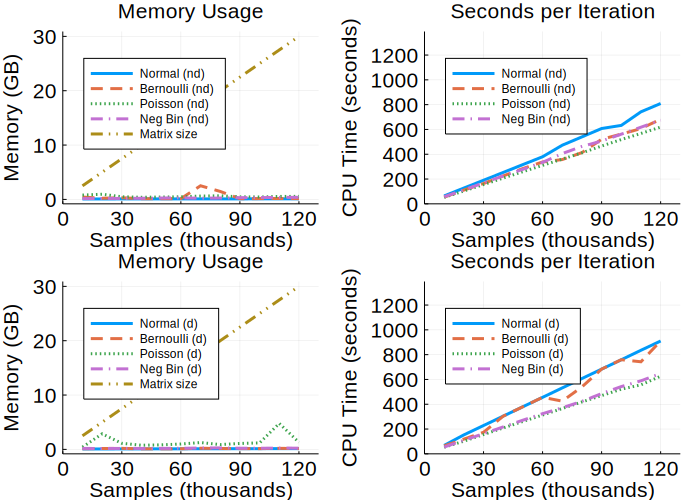

In [8]:
benchmark_plots = [no_debias_memory_plot no_debias_times_plot yes_debias_memory_plot yes_debias_times_plot]
benchmark = plot(benchmark_plots..., layout = (2, 2), size = (700, 500))

# Save individual plots in high resolution

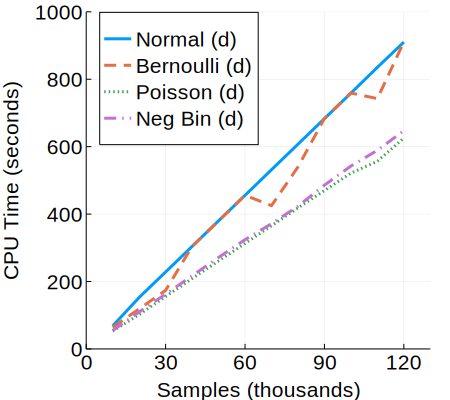

In [59]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1000),
    linestyle = [:solid :dash :dot :dashdot],
    xtickfont=font(14), ytickfont=font(14), guidefont=font(14), legendfont=font(14),
    size = (450, 400))

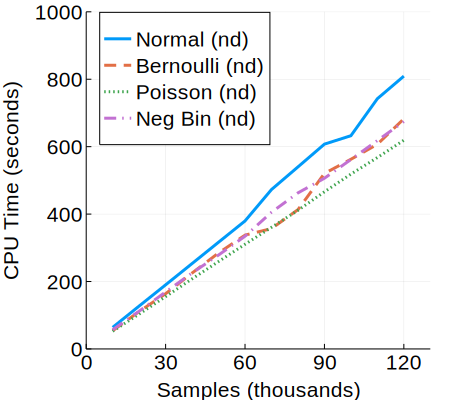

In [56]:
no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1000),
    linestyle = [:solid :dash :dot :dashdot],
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size = (450, 400))

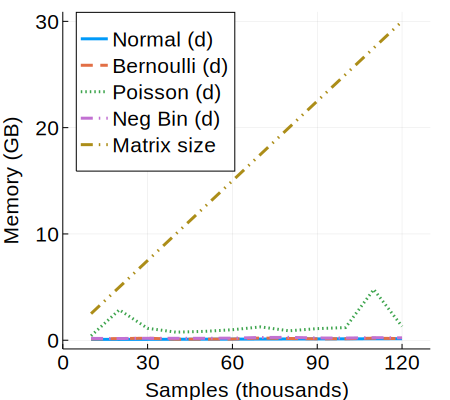

In [57]:
yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot],
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size=(450, 400))

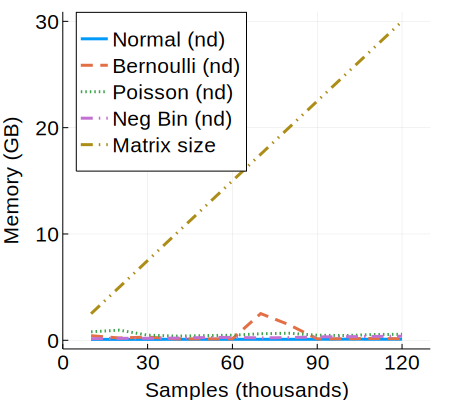

In [58]:
no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot],
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size=(450, 400))

In [60]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1000),
    linestyle = [:solid :dash :dot :dashdot], 
    xtickfont=font(14), ytickfont=font(14), guidefont=font(14), legendfont=font(14),
    size = (450, 400), dpi=300)
no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Samples (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1000),
    linestyle = [:solid :dash :dot :dashdot], 
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size = (450, 400), dpi=300)
yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Neg Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], 
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size=(450, 400), dpi=300)
no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Samples (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Neg Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], 
    xtickfont=font(14), 
    ytickfont=font(14), 
    guidefont=font(14), 
    legendfont=font(14), size=(450, 400), dpi=300)
savefig(yes_debias_times_plot, "yes_debias_times_plot")
savefig(no_debias_times_plot, "no_debias_times_plot")
savefig(yes_debias_memory_plot, "yes_debias_memory_plot")
savefig(no_debias_memory_plot, "no_debias_memory_plot")